In [88]:
import json

In [89]:
json_open = open("/harigai_workspace/dataset/negative/1.2.392.200036.9132.1.155.13436297020190423/1.2.392.200036.9142.10002202.1020330992.2.20190507181142.68882/1.2.392.200036.9142.10002202.1020330992.3.20190507181142.96584/AnnotationFile.Json")

In [90]:
json_load = json.load(json_open)

In [91]:
json_load[0].keys()

dict_keys(['cgPoints', 'label', '_id', 'type', 'color'])

In [92]:
json_load[0]["cgPoints"][0]

{'x': 364, 'y': 423.5}

In [93]:
# 点のペアを辞書から作成する関数
def dict_to_points(json_path):
    json_open = open(json_path)
    json_load = json.load(json_open)
    
    x_list = []
    y_list = []

    for i in range(len(json_load[0]["cgPoints"])):
        x = int(json_load[0]["cgPoints"][i]["x"])
        y = int(json_load[0]["cgPoints"][i]["y"])
        x_list.append(x)
        y_list.append(y)

    x_arr = np.array(x_list)
    y_arr = np.array(y_list)

    points = np.stack([x_arr, y_arr], axis=1)
    
    return points

In [94]:
import numpy as np
import cv2

In [95]:
json_path = "/harigai_workspace/dataset/negative/1.2.392.200036.9132.1.155.13436297020190423/1.2.392.200036.9142.10002202.1020330992.2.20190507181142.68882/1.2.392.200036.9142.10002202.1020330992.3.20190507181142.96584/AnnotationFile.Json"


# 真っ黒の画像を用意
img = np.zeros((640, 704), np.uint8)
# 点の集合をarrayにする
points = dict_to_points(json_path)

# 塗りつぶす
cv2.fillConvexPoly(img, points, (255, 255, 0))

cv2.imwrite("/harigai_workspace/dataset/mask.png", img)

True

In [96]:
img.max()

255

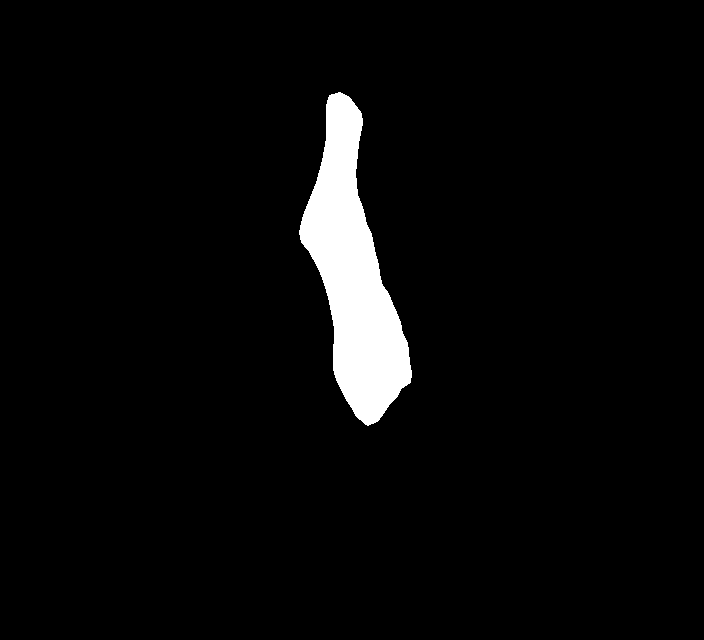

In [97]:
from PIL import Image
Image.fromarray(img)

In [98]:
import pydicom

dcm = pydicom.read_file("/harigai_workspace/dataset/negative/1.2.392.200036.9132.1.155.13436297020190423/1.2.392.200036.9142.10002202.1020330992.2.20190507181142.68882/1.2.392.200036.9142.10002202.1020330992.3.20190507181142.96584/DicomFile.dcm")

In [99]:
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9142.10002202.1020330992.3.20190507181142.96584
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.392.200054.30810000.0.1.1.2
(0002, 0013) Implementation Version Name         SH: 'AOC1.3'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: ['', 'ISO 2022 IR 87', 'ISO 2022 IR 13']
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'GDC']
(0008, 0012) Instance Creation Date              DA: '20190507'
(0008, 0013) Instance Creation Time              TM: '174624.000'
(0008, 0014) Instance Creator UID                UI: 1.2.3

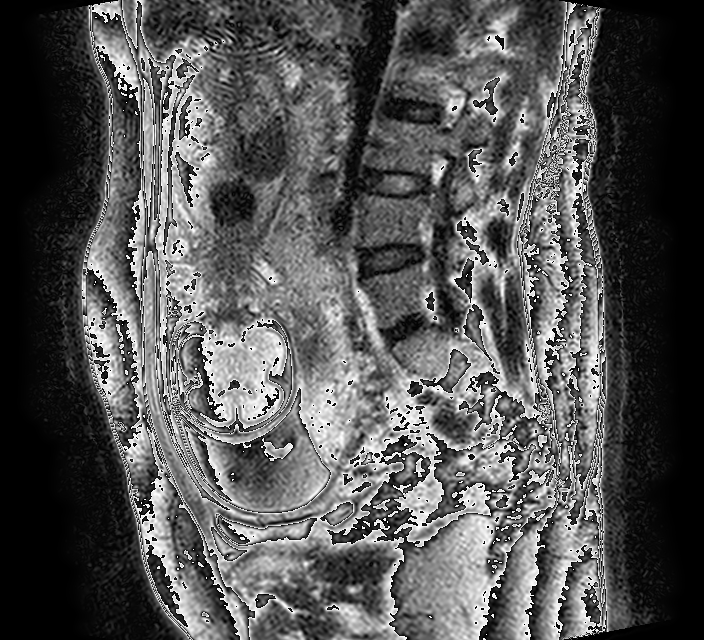

In [100]:
Image.fromarray(np.uint8(dcm.pixel_array))

In [101]:
add = img + np.uint8(dcm.pixel_array)

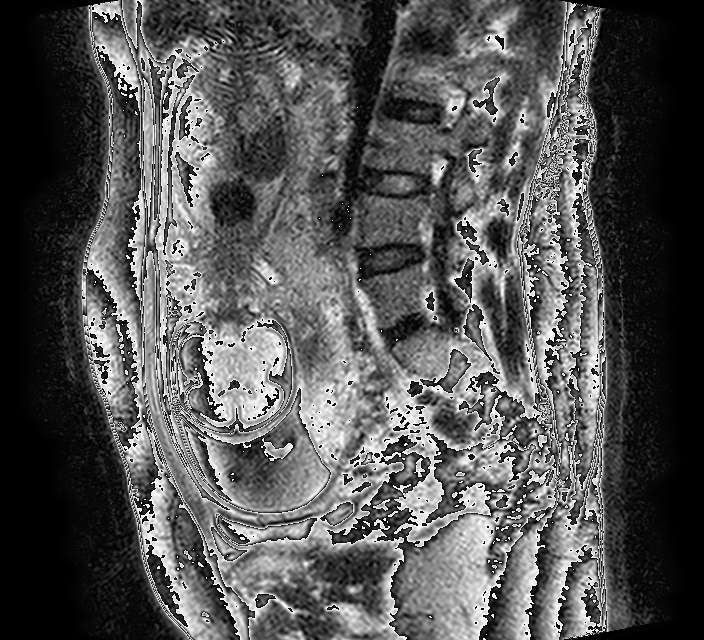

In [102]:
Image.fromarray(add)

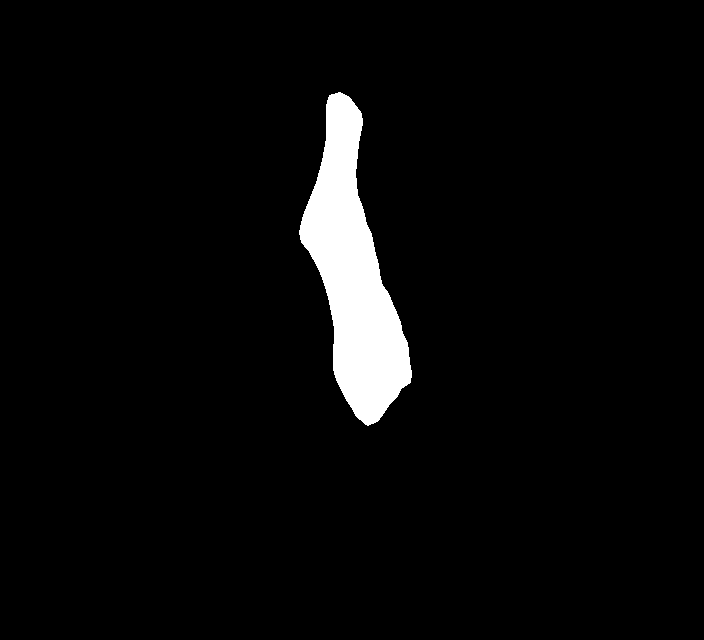

In [103]:
Image.fromarray(img)